In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

**Read in financial Data**

In [284]:
fin_data = pd.read_csv("../finance_data/data/aggregated_returns.csv", index_col=["Timestamp"], parse_dates=True)
fin_data = fin_data.drop(columns=["Unnamed: 0"])
fin_data = fin_data.sort_index()
fin_data.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-30,-0.022990,0.031939,0.005759,-0.002937,0.005449,-0.002515,-0.002350,-0.018279,-0.003982,0.004127,-0.026947
2010-07-01,-0.010390,0.023302,-0.021987,0.013874,-0.009283,-0.081723,-0.051293,-0.012200,-0.027190,-0.047668,-0.019717
2010-07-02,0.001305,0.010501,0.004610,-0.011670,-0.026683,-0.134312,-0.018751,-0.006217,-0.001368,-0.008280,-0.034667
2010-07-06,0.010376,-0.009063,0.023455,0.005852,0.017777,-0.175470,0.019735,0.006820,0.028094,0.023085,0.001238
2010-07-07,-0.007772,0.018515,0.007211,0.035820,0.006629,-0.019430,0.023836,0.039568,-0.001796,0.019048,-0.002878


In [285]:
fin_data.shape

(1896, 11)

In [286]:
fin_data.shift(-1)[0:4]

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-30,-0.010390,0.023302,-0.021987,0.013874,-0.009283,-0.081723,-0.051293,-0.012200,-0.027190,-0.047668,-0.019717
2010-07-01,0.001305,0.010501,0.004610,-0.011670,-0.026683,-0.134312,-0.018751,-0.006217,-0.001368,-0.008280,-0.034667
2010-07-02,0.010376,-0.009063,0.023455,0.005852,0.017777,-0.175470,0.019735,0.006820,0.028094,0.023085,0.001238
2010-07-06,-0.007772,0.018515,0.007211,0.035820,0.006629,-0.019430,0.023836,0.039568,-0.001796,0.019048,-0.002878


In [287]:
fin_data_class = fin_data.applymap(lambda x: 0 if x < 0 else 1)
fin_data_class = fin_data_class.shift(-1)

In [288]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-30,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-02,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2010-07-06,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-07-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [289]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 9902, 1: 10943, '0_relative': 47.5, '1_relative': 52.5}

**Read in training Data**

In [290]:
path_to_data = "../doc2vec/data/article_vectors_2015-11-25-2018-06-18.json"

In [291]:
data = pd.read_json(path_to_data)

In [292]:
data = data.applymap(lambda x: np.array(x))

In [293]:
data.head(2)

,Samsung,BASF,Apple,Tesla,Airbus,Bayer,BMW,Telefonica,Google,Allianz,Total
2015-11-25,"[[-0.09097237885, -0.512056529522, 0.448597371...","[[-0.224870830774, -3.794226408, -1.9525440931...","[[-2.04224681854, -1.60448515415, 0.2704625129...","[[-2.1069715023, -1.426415205, 1.64306604862, ...","[[2.23846936226, 3.11426877975, 0.093617297709...","[[1.51722872257, 2.5938539505, -0.247232601047...","[[0.157938063145, 0.579978168011, 0.4118370115...","[[0.473003387451, 2.60217881203, -0.5277323126...","[[-0.520612180233, -0.675680935383, -0.3074057...","[[0.0183677487075, 1.12623000145, -0.909998118...","[[-2.72483801842, 0.991170525551, -2.009325027..."
2015-11-26,"[[3.81038761139, 0.261076569557, 0.50902235508...","[[-1.22998988628, 0.361293852329, -0.980951845...","[[-0.65575748682, -0.652606129646, -1.20090234...","[[2.21736645699, -0.283544570208, 0.7639598250...","[[1.23432075977, 0.239986360073, -0.5406541228...","[[0.239219143987, -1.13649022579, -0.161926895...","[[-1.17502439022, 0.608320355415, 0.2831627428...","[[0.459036916494, 2.74760985374, -0.9232062101...","[[-0.319721221924, -0.454306691885, -1.1206489...","[[-2.44475650787, 1.04553902149, -0.1332414597...","[[0.563275456429, -2.01511955261, 1.2207951545..."


In [294]:
fin_data_dates = fin_data.index.date.tolist()
data_dates = data.index.date.tolist()

In [295]:
available_dates = list(set(fin_data_dates).intersection(data_dates))

fin_data_class = fin_data_class[fin_data_class.index.isin(available_dates)]
fin_data_train = fin_data[fin_data.index.isin(available_dates)]
data = data[data.index.isin(available_dates)]

In [296]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 3104, 1: 3397, '0_relative': 47.75, '1_relative': 52.25}

In [297]:
len(available_dates)

591

In [298]:
fin_data_train_vals = fin_data_train.values#.reshape(fin_data_train.shape[0], 1, fin_data_train.shape[1])
fin_data_train_vals.shape

(591, 11)

In [299]:
data.shape

(591, 11)

In [300]:
X = []

In [301]:
for idx, row in data.iterrows():
    #print(idx.date())
    tmp = data.loc[idx].values

    tmp_data = []
    for i,r in enumerate(tmp):
        #print(type(r))
        #print(type(r))
        if hasattr(r, 'shape') and r.shape[0] :
            #print(type(r))
            #print("HEY")
            r = np.array(r)
            #if r.shape[0] != 50:
            #    print(r.shape)
            p = 50-r.shape[0]
            r = np.pad(r, ((0,p),(0,0)), "constant")
            #print(r)
        else:
            r = np.zeros((50,100))
        tmp_data.append(r)
    tmp_data = np.array(tmp_data)
    tmp_data = tmp_data.reshape((50,100,11))
    #print(tmp_data)
    X.append(tmp_data)
    #data_dict[idx.date()] = tmp
    

In [302]:
X[0][0]

array([[-0.09097238, -0.51205653,  0.44859737, ...,  1.4446882 ,
         0.47213051, -2.83995199],
       [ 1.95817542,  0.74424815,  1.44354796, ..., -2.98738217,
        -0.17140767, -2.34347701],
       [ 0.48954654, -0.95549279, -2.56482577, ..., -2.01952577,
         2.60814977,  2.29795051],
       ..., 
       [ 1.70078266, -1.97810698,  0.12305968, ...,  2.63470483,
         0.11687999, -2.34644175],
       [ 0.56562304,  1.07893801, -1.85002875, ...,  0.65592211,
        -0.54387766, -0.20035765],
       [-1.85888422,  0.01419361,  0.76624453, ..., -0.70436901,
         1.79512227, -2.3566792 ]])

In [303]:
#X = np.array(final_d)
X = np.array(X)
X.shape

(591, 50, 100, 11)

In [ ]:
#m[:, ::-1]

In [304]:
X_flipped = np.flipud(X[:300])
X_flipped.shape

(300, 50, 100, 11)

In [305]:
X_flipped[0][-1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [306]:
X_augmented = np.concatenate((X[:300], X_flipped))
X_augmented.shape

(600, 50, 100, 11)

In [307]:
Y = fin_data_class.values
Y_augmented = np.concatenate((Y[:300], Y[:300].copy()))
Y_augmented.shape

(600, 11)

In [308]:
fin_data_train_vals_augmented = np.concatenate((fin_data_train_vals[:300], fin_data_train_vals[:300].copy()))
fin_data_train_vals_augmented.shape

(600, 11)

**CNN**

In [309]:
from sklearn.model_selection import train_test_split

from keras import backend as K
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GaussianNoise, GaussianDropout
from keras.layers import Conv1D, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalMaxPooling3D

from keras.initializers import RandomNormal

from keras import regularizers

from collections import Counter

In [310]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [311]:
Y_augmented.shape

(600, 11)

In [312]:
x_train, x_val, x_ret_train, x_ret_val, y_train, y_val = train_test_split(X, fin_data_train_vals, Y, 
                                                  test_size=0.4, random_state=58)

x_train_aug, x_val_aug, x_ret_train_aug, x_ret_val_aug, y_train_aug, y_val_aug = train_test_split(X_augmented, fin_data_train_vals_augmented, Y_augmented, test_size=0.01, random_state=58)

In [120]:
val_count = {0: 0, 1: 0}

for y in y_train_aug:
    tmp = Counter(y)
    #print(tmp)
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 3414, 1: 3120, '0_relative': 52.25, '1_relative': 47.75}

In [121]:
x_train_aug.shape

(594, 50, 100, 11)

In [264]:
num_classes=11
num_filters= 150
filter_sizes = [3,4,5]
embedding_dim = x_train_aug.shape[2]
sequence_length = x_train_aug.shape[1] 

In [123]:
sequence_length

50

In [124]:
def custom_tanh(x):
    return (K.tanh((2/3)*x) * 1.5)#1.7159) #(2/3)

def custom_sigmoid(x):
    return (K.sigmoid((3/4) * x) )#* 1.7159)

In [130]:
def make_first_model():
    model = Sequential()
    model.add(GaussianNoise(stddev=1,input_shape=x_train_aug.shape[1:]))
    model.add(Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid',#input_shape=x_train.shape[1:], 
                     data_format="channels_last", activation="relu", kernel_regularizer=regularizers.l2(0.01),
                     kernel_initializer=RandomNormal())) #relu
    #, kernel_regularizer=regularizers.l2(0.01)
    #model.add(Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='same', activation="relu"))

    model.add(BatchNormalization(axis=3))
    model.add(GaussianDropout(0.4))
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) #data_format="channels_last"
    model.add(AveragePooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) 
    #model.add(GlobalMaxPooling3D(data_format="channels_last"))
    model.add(BatchNormalization(axis=3))
    #model.add(Conv2D(num_filters, kernel_size=(1,embedding_dim), strides=(1,1), activation="relu"))
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1)))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(GaussianNoise(stddev=3))

    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    #model.add(GaussianDropout(0.5))
    model.add(Dense(512, activation="relu")) #custom_tanh "relu" custom_tanh
    #model.add(Activation('relu'))
    model.add(GaussianDropout(0.5))
    #model.add(Dense(512, activation="relu"))
    #model.add(Dense(512, activation="relu"))
    model.add(Dense(num_classes, activation=custom_sigmoid)) #"sigmoid"  custom_sigmoid 
    
    adam_opt = keras.optimizers.adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

    model.compile(loss='binary_crossentropy', 
              optimizer=adam_opt,#opt,"Adam"
              metrics=['binary_accuracy', f1, precision, recall]) #'binary_accuracy',
    
    return model

In [131]:
first_model = make_first_model()
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_3 (GaussianNo (None, 50, 100, 11)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 1, 100)        330100    
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 1, 100)        400       
_________________________________________________________________
gaussian_dropout_6 (Gaussian (None, 48, 1, 100)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 100)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 1, 100)         400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 100)         0         
__________

In [132]:
history = first_model.fit(x_train_aug, y_train_aug, validation_data = (x_val_aug, y_val_aug),
                          epochs=60, batch_size=10, verbose=2)

Train on 594 samples, validate on 6 samples
Epoch 1/60
 - 5s - loss: 8.6004 - binary_accuracy: 0.4963 - f1: 0.4541 - precision: 0.4707 - recall: 0.4447 - val_loss: 8.1400 - val_binary_accuracy: 0.5152 - val_f1: 0.3600 - val_precision: 0.4500 - val_recall: 0.3000
Epoch 2/60
 - 4s - loss: 7.8637 - binary_accuracy: 0.5021 - f1: 0.4605 - precision: 0.4795 - recall: 0.4550 - val_loss: 7.4551 - val_binary_accuracy: 0.5000 - val_f1: 0.4590 - val_precision: 0.4516 - val_recall: 0.4667
Epoch 3/60
 - 4s - loss: 7.2001 - binary_accuracy: 0.5159 - f1: 0.4778 - precision: 0.4928 - recall: 0.4723 - val_loss: 6.8436 - val_binary_accuracy: 0.4848 - val_f1: 0.5278 - val_precision: 0.4524 - val_recall: 0.6333
Epoch 4/60
 - 4s - loss: 6.6224 - binary_accuracy: 0.5018 - f1: 0.4611 - precision: 0.4806 - recall: 0.4539 - val_loss: 6.2933 - val_binary_accuracy: 0.5152 - val_f1: 0.5676 - val_precision: 0.4773 - val_recall: 0.7000
Epoch 5/60
 - 5s - loss: 6.0985 - binary_accuracy: 0.5060 - f1: 0.4587 - precisi

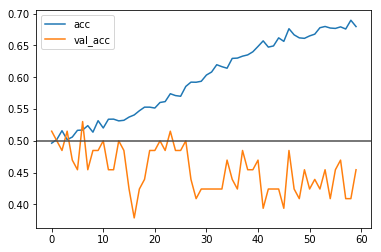

In [233]:
plt.plot(history.history["binary_accuracy"], label="acc")
plt.plot(history.history["val_binary_accuracy"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

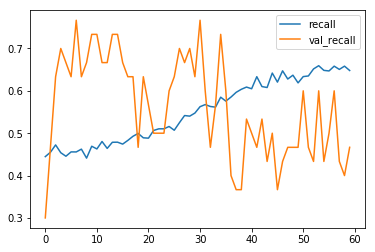

In [234]:
plt.plot(history.history["recall"], label="recall")
plt.plot(history.history["val_recall"], label="val_recall")

plt.legend()
plt.show()

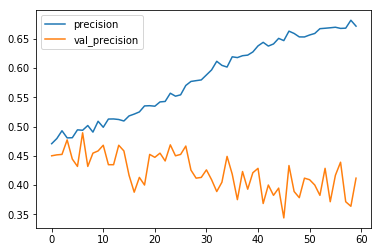

In [235]:
plt.plot(history.history["precision"], label="precision")
plt.plot(history.history["val_precision"], label="val_precision")

plt.legend()
plt.show()

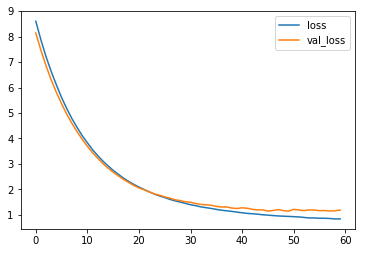

In [236]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [237]:
preds = first_model.predict(X)#X[300:]


In [238]:
df_y_val = pd.DataFrame(y_val_aug, columns=fin_data_class.columns)

In [239]:
fin_data_class.shape

(591, 11)

In [240]:
df_predictions = pd.DataFrame(preds, columns=fin_data_class.columns, index = fin_data_class.index) #, index = fin_data_class.index
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2015-11-25,0.769683,0.875923,0.322254,0.458435,0.206550,0.850359,0.412612,0.419158,0.389960,0.650681,0.728095
2015-11-27,0.492658,0.211967,0.258724,0.366455,0.393365,0.293715,0.407564,0.492536,0.332296,0.439444,0.214607
2015-11-30,0.591274,0.151623,0.494811,0.865134,0.777221,0.856104,0.454776,0.616003,0.551285,0.750511,0.261494
2015-12-01,0.792483,0.615463,0.774238,0.843108,0.854925,0.395807,0.719354,0.809630,0.791909,0.837737,0.763015
2015-12-02,0.763555,0.582255,0.499583,0.389961,0.532820,0.675412,0.674807,0.277465,0.743508,0.685168,0.750569


In [141]:
def count_fp(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if 1 in tmp.value_counts() or 1.0 in tmp.value_counts():

        return tmp.value_counts()[1]
        
    else:
        return 0
    
def count_fn(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if -1 in tmp.value_counts() or -1.0 in tmp.value_counts():

        return tmp.value_counts()[-1]
    
    else:
        return 0

In [142]:
def try_cuts_arr(df, cut_count):
    
    cuts = np.linspace(0,1,cut_count)
    accs = []
    fp = []
    fn = []
    
    
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)

        df_tmp = df_y_val.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
        
        false_positive = np.sum(df_tmp.apply(count_fp, axis=1))
        false_negative = df_tmp.apply(count_fn, axis=1).sum()
        
        fp.append(false_positive)
        fn.append(false_negative)
        
    return accs, fp, fn, cuts

In [143]:
def try_cuts(df, cut_count, subset=None):
    
    cuts = np.linspace(0,1,cut_count)
    accs = []
    fp = []
    fn = []
    
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)
        if subset:
            df_tmp = fin_data_class[subset].rsub(df_tmp)
        else:
            df_tmp = fin_data_class.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
        
        false_positive = np.sum(df_tmp.apply(count_fp, axis=1))
        false_negative = df_tmp.apply(count_fn, axis=1).sum()
        
        fp.append(false_positive)
        fn.append(false_negative)
        
        
    return accs, fp, fn, cuts

In [171]:
accs, fp, fn, cuts = try_cuts(df_predictions, 60, subset=None) #subset=slice(300, -1)
#accs, fp, fn, cuts = try_cuts_arr(df_predictions, 30)

In [172]:
max_index = accs.index(max(accs))
cuts[max_index]

0.5423728813559322

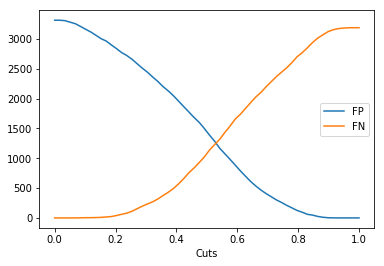

In [173]:
plt.plot(cuts, fp, label="FP")
plt.plot(cuts, fn, label="FN")
plt.xlabel("Cuts")
plt.legend()
plt.show()

Text(0,0.5,'Accuracy')

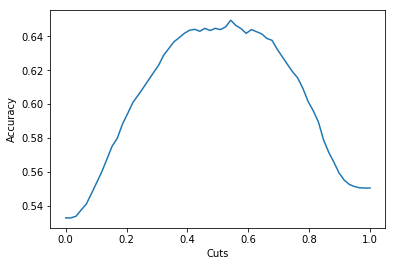

In [174]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [175]:
(np.array(fp)==np.array(fn)).all()

False

In [176]:
df_predictions = df_predictions.applymap(lambda x: 1 if x > cuts[max_index] else 0) #cuts[max_index]
df_predictions.to_csv("./predictions/predictions_frst_model_non_training_data_with_data_augmentation.csv")
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2015-11-25,1,1,0,0,0,1,0,0,0,1,1
2015-11-27,0,0,0,0,0,0,0,0,0,0,0
2015-11-30,1,0,0,1,1,1,0,1,1,1,0
2015-12-01,1,1,1,1,1,0,1,1,1,1,1
2015-12-02,1,1,0,0,0,1,1,0,1,1,1


In [149]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2015-11-25,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2015-11-27,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2015-11-30,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2015-12-01,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2015-12-02,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [150]:
df_pred_errors = fin_data_class.rsub(df_predictions)

In [151]:
df_pred_errors["error_sum"] = df_pred_errors.apply(lambda x: np.sum(abs(x)), axis=1)
df_pred_errors["fale_pos_sum"] = df_pred_errors.apply(count_fp, axis=1)
df_pred_errors["fale_neg_sum"] = df_pred_errors.apply(count_fn, axis=1)

In [152]:
df_pred_errors["fale_pos_sum"].sum()

1303

In [153]:
df_pred_errors["fale_neg_sum"].sum()

264

In [154]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report

In [155]:
print(classification_report(Y[300:].ravel(), df_predictions.values.ravel()))

             precision    recall  f1-score   support

        0.0       0.52      0.18      0.27      1588
        1.0       0.51      0.84      0.63      1613

avg / total       0.51      0.51      0.45      3201



In [156]:
precision, recall, thresholds = precision_recall_curve(Y[300:].ravel(), preds.ravel())

Text(0,0.5,'Precision')

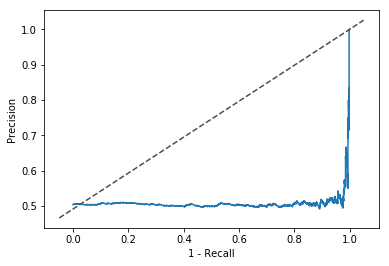

In [157]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [158]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y[300:].ravel(), preds.ravel())

In [159]:
auc_keras = auc(fpr_keras, tpr_keras)

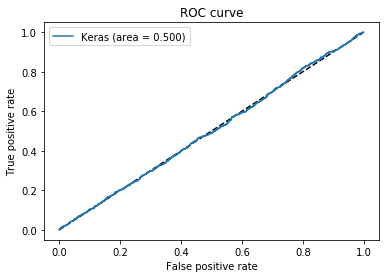

In [160]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [161]:
confusion_matrix(Y[300:].ravel(), df_predictions.values.ravel())

array([[ 285, 1303],
       [ 264, 1349]], dtype=int64)

## Second Model

In [313]:
from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout, Concatenate, Activation
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding, MaxPool2D, AvgPool2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

from keras.optimizers import Adam

In [314]:
def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=3)(input)
    return Activation("relu")(norm)

def _relu_bn(input):
    """Helper to build a relu -> BN block
    """
    act = Activation("relu")(input)
    return BatchNormalization(axis=3)(act)

def _bn_relu_flat(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=1)(input)
    return Activation("relu")(norm)

In [318]:
inputs = Input(shape=x_train.shape[1:], dtype="float64", name="input_d2v")#, dtype='int32'[1:]

return_inputs = Input(shape=x_ret_train.shape[1:], name="input_rets")#, dtype="float64")

#reshape = Reshape((x_train[0],sequence_length,embedding_dim,11))(x_train)
dense_returns = Dense(50, activation=custom_tanh)(return_inputs)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', 
                kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_0 = _bn_relu(conv_0)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', 
                kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_1 = _bn_relu(conv_1)#atchNormalization()(conv_1)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', 
                kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_2 = _bn_relu(conv_2) #BatchNormalization()(conv_2)



maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
avgpool_0 = AvgPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
dropout_0 = Dropout(0.5)(maxpool_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_1)#(conv_1)
avgpool_1 = AvgPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_1)#(conv_0)
dropout_1 = Dropout(0.5)(maxpool_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_2)#(conv_2)
avgpool_2 = AvgPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_2)#(conv_0)
dropout_2 = Dropout(0.5)(avgpool_2)

concatenated_tensor = concatenate([dropout_0, dropout_1, dropout_2]) #(axis=1) ([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
flatten_with_returns = concatenate([flatten, dense_returns])
#flatten_2 = Flatten()(flatten_with_returns)
hidden_layer = Dense(256)(flatten_with_returns) #flatten , activation="relu"
batch_norm_3 = _bn_relu_flat(hidden_layer)
dropout_3 = Dropout(0.5)(batch_norm_3)
hidden_layer_2 = Dense(128)(dropout_3) #flatten , activation="relu"
batch_norm_4 = _bn_relu_flat(hidden_layer_2)
dropout_4 = Dropout(0.5)(batch_norm_4)
output = Dense(num_classes, activation=custom_sigmoid)(dropout_4) #"softmax"

# this creates a model that includes
model = Model(inputs=[inputs, return_inputs], outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=2, 
                             save_best_only=True, mode='auto')
tensorboard = TensorBoard(log_dir='./logs/run1', histogram_freq=1, write_graph=True, write_images=False)  

adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0) #1e-8

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', f1, recall, precision])
print("Traning Model...")
model.summary()

Traning Model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_d2v (InputLayer)          (None, 50, 100, 11)  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 48, 1, 150)   495150      input_d2v[0][0]                  
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 47, 1, 150)   660150      input_d2v[0][0]                  
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 46, 1, 150)   825150      input_d2v[0][0]                  
____________________________________________________________________________________________

In [319]:
model_train_input = {"input_d2v": x_train_aug, "input_rets": x_ret_train_aug}
model_val_input = {"input_d2v": x_val_aug, "input_rets": x_ret_val_aug}

In [320]:
y_train_aug.shape

(594, 11)

In [321]:
model2 = model.fit(model_train_input, y_train_aug, batch_size=32, epochs=60, verbose=2, callbacks=[checkpoint], #tensorboard
                   validation_data=(model_val_input, y_val_aug)) # starts training

Train on 594 samples, validate on 6 samples
Epoch 1/60
Epoch 00001: val_acc improved from -inf to 0.63636, saving model to weights.001-0.6364.hdf5
 - 18s - loss: 78.1403 - acc: 0.5087 - f1: 0.5621 - recall: 0.5987 - precision: 0.5311 - val_loss: 76.1947 - val_acc: 0.6364 - val_f1: 0.7273 - val_recall: 0.7805 - val_precision: 0.6809
Epoch 2/60
Epoch 00002: val_acc did not improve
 - 11s - loss: 74.6318 - acc: 0.5066 - f1: 0.5594 - recall: 0.5957 - precision: 0.5289 - val_loss: 72.6643 - val_acc: 0.6212 - val_f1: 0.7126 - val_recall: 0.7561 - val_precision: 0.6739
Epoch 3/60
Epoch 00003: val_acc did not improve
 - 12s - loss: 71.2192 - acc: 0.5194 - f1: 0.5721 - recall: 0.6122 - precision: 0.5396 - val_loss: 69.3140 - val_acc: 0.6212 - val_f1: 0.6988 - val_recall: 0.7073 - val_precision: 0.6905
Epoch 4/60
Epoch 00004: val_acc improved from 0.63636 to 0.68182, saving model to weights.004-0.6818.hdf5
 - 12s - loss: 67.9283 - acc: 0.5139 - f1: 0.5601 - recall: 0.5881 - precision: 0.5376 - v

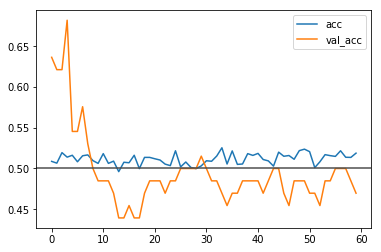

In [322]:
plt.plot(model2.history["acc"], label="acc")
plt.plot(model2.history["val_acc"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

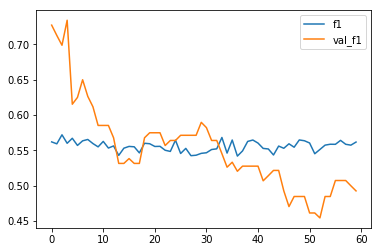

In [323]:
plt.plot(model2.history["f1"], label="f1")
plt.plot(model2.history["val_f1"], label="val_f1")

plt.legend()
plt.show()

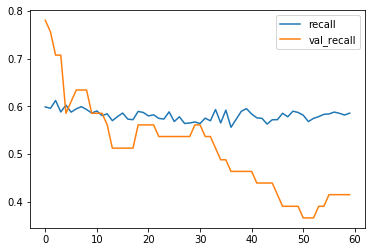

In [324]:
plt.plot(model2.history["recall"], label="recall")
plt.plot(model2.history["val_recall"], label="val_recall")

plt.legend()
plt.show()

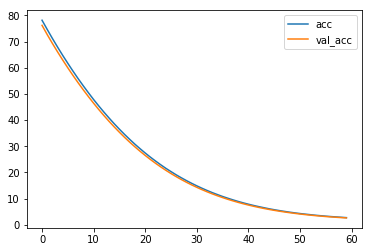

In [325]:
plt.plot(model2.history["loss"], label="acc")
plt.plot(model2.history["val_loss"], label="val_acc")
plt.legend()
plt.show()

In [326]:
preds2 = model.predict([X[300:], fin_data_train_vals[300:]])

In [327]:
df_predictions2 = pd.DataFrame(preds2, columns=fin_data_class.columns, index = fin_data_class[300:].index) #, index = fin_data_class[300:].index
df_predictions2.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2017-03-16,0.556646,0.478174,0.547453,0.534088,0.510106,0.465790,0.537112,0.490327,0.481985,0.474605,0.443605
2017-03-17,0.536055,0.461570,0.569908,0.565544,0.509083,0.486554,0.554193,0.449249,0.478197,0.485805,0.447369
2017-03-20,0.545807,0.484752,0.536010,0.532452,0.500150,0.489072,0.529660,0.484092,0.501854,0.483898,0.465522
2017-03-21,0.578641,0.444170,0.530612,0.570145,0.488992,0.501111,0.557445,0.469205,0.483279,0.450129,0.476344
2017-03-22,0.563035,0.474697,0.554222,0.528193,0.511711,0.507954,0.557651,0.493816,0.466486,0.473110,0.469104


In [328]:
accs, fp, fn, cuts = try_cuts(df_predictions2, 50, subset=slice(300,-1)) #, subset=slice(0,250)
#accs, fp, fn, cuts = try_cuts_arr(df_predictions2, 60)
max_index = accs.index(max(accs))
print("Achieved Accuracy {}% with a cut at {}".format(round(max(accs)*100, 2), round(cuts[max_index], 2)))

Achieved Accuracy 55.87% with a cut at 0.43


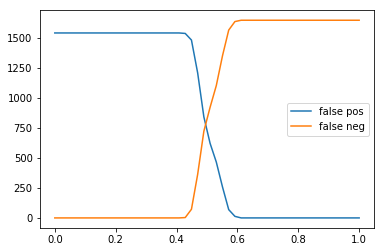

In [329]:
plt.plot(cuts, fp, label="false pos")
plt.plot(cuts, fn, label="false neg")
plt.legend()
plt.show()

Text(0,0.5,'Accuracy')

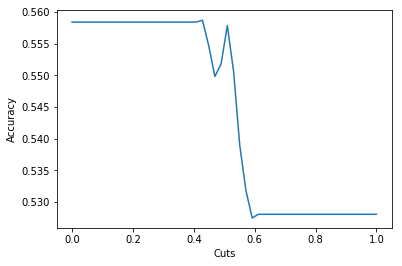

In [330]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [331]:
df_predictions2 = df_predictions2.applymap(lambda x: 1 if x > 0.51 else 0) # cuts[max_index]
df_predictions2.to_csv("./predictions/predictions_scnd_model_without_training_LOOKING_AT_PR.csv")
df_predictions2.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-11,1,0,1,1,0,0,1,0,0,0,0
2018-06-12,1,0,1,1,0,0,1,0,0,0,0
2018-06-14,1,0,1,1,1,1,1,0,0,0,0
2018-06-15,1,0,1,1,0,0,1,0,0,0,0
2018-06-18,1,0,1,1,0,0,1,0,0,0,0


In [255]:
fin_data_class.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-11,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2018-06-12,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2018-06-14,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2018-06-15,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2018-06-18,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [281]:
precision, recall, thresholds = precision_recall_curve(Y[300:].ravel(), preds2.ravel())

Text(0,0.5,'Precision')

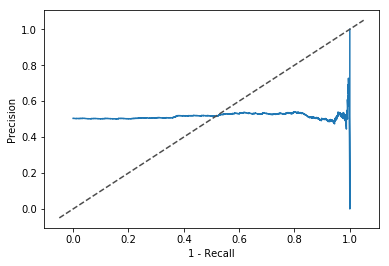

In [282]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [332]:
print(classification_report(Y[300:].ravel(), df_predictions2.values.ravel()))

             precision    recall  f1-score   support

        0.0       0.50      0.60      0.54      1551
        1.0       0.54      0.44      0.48      1650

avg / total       0.52      0.52      0.51      3201



In [333]:
confusion_matrix(Y[300:].ravel(), df_predictions2.values.ravel())

array([[924, 627],
       [922, 728]], dtype=int64)